In [1]:
import pandas as pd
import numpy as np
import os

Ucitavanje baze, podela na trening, test i validacioni skup, skaliranje i primena PCA algoritma.

In [2]:
pd.set_option('display.max_columns', 600)

In [3]:
database = pd.read_csv('celaBazaPosleEpiMut.csv', sep=',', header=0)

In [4]:
database

Gene name variation  alpha-CH chemical shifts (Andersen et al., 1992) 1  \
0          MTOR    M1083V                                          14.742968    
1          MTOR    A1134V                                          -6.753854    
2          AKT1     V167A                                           4.318244    
3        MAP2K1     A366G                                          -8.043543    
4        MAP2K1     G392S                                          -9.852562    
...         ...       ...                                                ...    
95894     NT5C2     R195Q                                          -0.248485    
95895     NT5C2     G355E                                           9.329554    
95896     NT5C2      M53R                                           3.432416    
95897     NT5C2     G273W                                          -8.458504    
95898     NT5C2     S251R                                           2.116767    

       Hydrophobicity index (Argos et al., 1982) 1  \
0                                       -33.311483   
1                                       -54.468830   
2                                        27.903090   
3                                         9.511877   
4                                         1.481990   
...                                            ...   
95894                                   -45.966315   
95895                                   -32.979865   
95896                                    16.042263   
95897                                   194.497802   
95898                                   -45.342221   

       Signal sequence helical potential (Argos et al., 1982) 1  \
0                                             591.554818          
1                                             -23.158126          
2                                              -5.784182          
3                                              65.541026          
4                                              24.888312          
...                                                  ...          
95894                                          54.832550          
95895                                          44.546857          
95896                                          75.554689          
95897                                          30.518072          
95898                                          89.195976          

       Membrane-buried preference parameters (Argos et al., 1982) 1  \
0                                             605.156577              
1                                             -92.762155              
2                                             -20.847024              
3                                              83.522085              
4                                               8.298248              
...                                                  ...              
95894                                          -4.802087              
95895                                          -3.918395              
95896                                         169.641178              
95897                                         -38.450264              
95898                                          32.758690              

       Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1  \
0                                               5.875901                
1                                               9.222564                
2                                               5.140362                
3                                              -6.650271                
4                                               0.000000                
...                                                  ...                
95894                                          -0.936179                
95895                                           8.448055                
95896                                          -7.590063             

In [4]:
database.describe()

alpha-CH chemical shifts (Andersen et al., 1992) 1  \
count                                       95899.000000    
mean                                            0.698141    
std                                            15.617005    
min                                          -225.515870    
25%                                            -3.979647    
50%                                             0.000000    
75%                                             5.271487    
max                                           233.716377    

       Hydrophobicity index (Argos et al., 1982) 1  \
count                                 95899.000000   
mean                                      7.893816   
std                                     151.795453   
min                                   -1405.775472   
25%                                     -52.398052   
50%                                       0.916813   
75%                                      65.737574   
max                                    1819.713963   

       Signal sequence helical potential (Argos et al., 1982) 1  \
count                                       95899.000000          
mean                                            6.919372          
std                                           180.022927          
min                                         -1507.604710          
25%                                           -44.257530          
50%                                             2.377047          
75%                                            56.295043          
max                                          1406.144672          

       Membrane-buried preference parameters (Argos et al., 1982) 1  \
count                                       95899.000000              
mean                                            5.546603              
std                                           151.454028              
min                                         -1166.625173              
25%                                           -38.164651              
50%                                             1.892493              
75%                                            48.797549              
max                                          1226.635452              

       Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1  \
count                                       95899.000000                
mean                                            1.763952                
std                                            24.452448                
min                                          -219.961016                
25%                                            -6.783583                
50%                                             0.228709                
75%                                             9.409683                
max                                           219.450784                

       Conformational parameter of beta-structure (Beghin-Dirkx, 1975) 1  \
count                                       95899.000000                   
mean                                            0.288530                   
std                                             6.135673                   
min                                           -56.158758                   
25%                                            -1.625076                   
50%                                             0.000000                   
75%                                             2.197984                   
max                                            58.191687                   

       Conformational parameter of beta-turn (Beghin-Dirkx, 1975) 1  \
count                                       95899.000000              
mean                                            0.699405              
std                                            11.303624              
min                                           -92.207657              
25%                         

In [4]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt  

In [5]:
y = database['Class']

In [6]:
X = database.drop(columns=['Class', 'Gene name', 'variation'])

In [7]:
X_train_val, X_test, y_train_val, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 7, stratify=y)

In [8]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state = 7, stratify=y_train_val)

In [9]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_val)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [10]:
norm = preprocessing.MinMaxScaler()
norm.fit(X_train)
X_trainN = norm.transform(X_train)
X_testN = norm.transform(X_test)
X_valN = norm.transform(X_val)

Izvlacenje maksimalne i minimalne korelacije svih atributa sa ciljnom promenljivom i uvid u međusobnu korelaciju atributa.

In [94]:
XTrain = pd.DataFrame(X_train, columns=X.columns)

In [95]:
XTrain

alpha-CH chemical shifts (Andersen et al., 1992) 1  \
0                                               0.218010    
1                                              -0.072908    
2                                               0.458489    
3                                              -1.244282    
4                                               0.097077    
...                                                  ...    
61370                                          -0.955757    
61371                                           2.411859    
61372                                          -1.563083    
61373                                           0.013769    
61374                                          -0.325847    

       Hydrophobicity index (Argos et al., 1982) 1  \
0                                         2.219233   
1                                         0.728221   
2                                         0.620178   
3                                         1.688967   
4                                         0.273382   
...                                            ...   
61370                                     0.398884   
61371                                     1.710348   
61372                                    -0.481869   
61373                                     0.551040   
61374                                     0.121858   

       Signal sequence helical potential (Argos et al., 1982) 1  \
0                                               0.049106          
1                                               0.694301          
2                                               0.409515          
3                                               1.357233          
4                                               0.033372          
...                                                  ...          
61370                                           0.129736          
61371                                           3.199780          
61372                                           0.037305          
61373                                          -0.162288          
61374                                           0.051814          

       Membrane-buried preference parameters (Argos et al., 1982) 1  \
0                                               0.058007              
1                                               0.056425              
2                                               0.085958              
3                                               0.696673              
4                                               0.061802              
...                                                  ...              
61370                                           0.077638              
61371                                           2.552146              
61372                                          -0.653838              
61373                                          -0.152296              
61374                                           0.031252              

       Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1  \
0                                              -0.464710                
1                                               0.106103                
2                                               0.029127                
3                                               1.711487                
4                                              -0.951001                
...                                                  ...                
61370                                           0.396607                
61371                                           0.562400                
61372                                          -0.749710                
61373                                           0.045447                
61374                                           0.153568                

       Conformational parameter of beta-structure (Beghin-Dirkx, 1975) 1  \
0             

In [96]:
XTrain.insert(len(XTrain.columns), "Class", y_train.values, True)

In [97]:
XTrain

alpha-CH chemical shifts (Andersen et al., 1992) 1  \
0                                               0.218010    
1                                              -0.072908    
2                                               0.458489    
3                                              -1.244282    
4                                               0.097077    
...                                                  ...    
61370                                          -0.955757    
61371                                           2.411859    
61372                                          -1.563083    
61373                                           0.013769    
61374                                          -0.325847    

       Hydrophobicity index (Argos et al., 1982) 1  \
0                                         2.219233   
1                                         0.728221   
2                                         0.620178   
3                                         1.688967   
4                                         0.273382   
...                                            ...   
61370                                     0.398884   
61371                                     1.710348   
61372                                    -0.481869   
61373                                     0.551040   
61374                                     0.121858   

       Signal sequence helical potential (Argos et al., 1982) 1  \
0                                               0.049106          
1                                               0.694301          
2                                               0.409515          
3                                               1.357233          
4                                               0.033372          
...                                                  ...          
61370                                           0.129736          
61371                                           3.199780          
61372                                           0.037305          
61373                                          -0.162288          
61374                                           0.051814          

       Membrane-buried preference parameters (Argos et al., 1982) 1  \
0                                               0.058007              
1                                               0.056425              
2                                               0.085958              
3                                               0.696673              
4                                               0.061802              
...                                                  ...              
61370                                           0.077638              
61371                                           2.552146              
61372                                          -0.653838              
61373                                          -0.152296              
61374                                           0.031252              

       Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1  \
0                                              -0.464710                
1                                               0.106103                
2                                               0.029127                
3                                               1.711487                
4                                              -0.951001                
...                                                  ...                
61370                                           0.396607                
61371                                           0.562400                
61372                                          -0.749710                
61373                                           0.045447                
61374                                           0.153568                

       Conformational parameter of beta-structure (Beghin-Dirkx, 1975) 1  \
0             

In [98]:
corrArr = XTrain.corr()['Class']

In [99]:
c = XTrain.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

In [100]:
so[1:]

Relative population of conformational state E (Vasquez et al., 1983) 1         Relative population of conformational state E (Vasquez et al., 1983) 1         1.000000e+00
Normalized frequency of left-handed helix (Tanaka-Scheraga, 1977) 1            Normalized frequency of left-handed helix (Tanaka-Scheraga, 1977) 1            1.000000e+00
Normalized frequency of zeta R (Tanaka-Scheraga, 1977) 1                       Normalized frequency of zeta R (Tanaka-Scheraga, 1977) 1                       1.000000e+00
Normalized frequency of coil (Tanaka-Scheraga, 1977) 1                         Normalized frequency of coil (Tanaka-Scheraga, 1977) 1                         1.000000e+00
Normalized frequency of chain reversal (Tanaka-Scheraga, 1977) 1               Normalized frequency of chain reversal (Tanaka-Scheraga, 1977) 1               1.000000e+00
                                                                                                                                                 

In [112]:
corrArr

alpha-CH chemical shifts (Andersen et al., 1992) 1                        0.000955
Hydrophobicity index (Argos et al., 1982) 1                               0.000791
Signal sequence helical potential (Argos et al., 1982) 1                 -0.000256
Membrane-buried preference parameters (Argos et al., 1982) 1             -0.005079
Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1            0.005968
                                                                            ...   
Weighted maximum eigenvalue based on the atomic numbers 1                 0.008276
Weighted minimum eigenvalue based on the atomic numbers 1                -0.008075
Weighted average eigenvalue based on the atomic numbers 1                 0.008428
Weighted second smallest eigenvalue of the weighted Laplacian matrix 1    0.006465
Class                                                                     1.000000
Name: Class, Length: 554, dtype: float64

In [101]:
max(corrArr[0:-1])

0.018529810218814537

In [102]:
min(corrArr[0:-1])

-0.009206904250171337

Odnos klasa u podacima trening skupa.

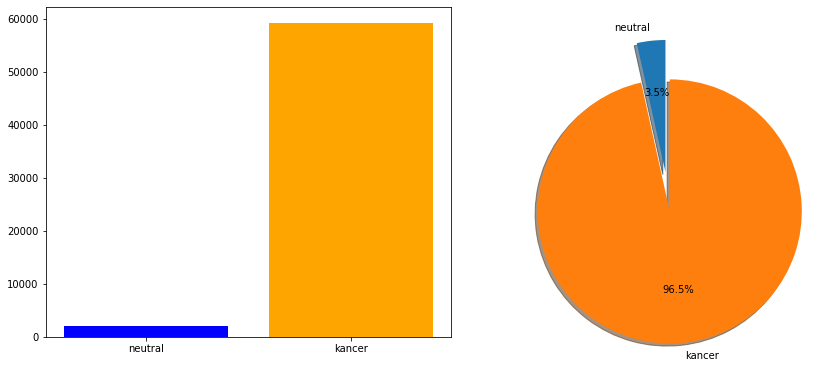

In [105]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=True)
#plt.subplots_adjust(wspace = 0.5)
ax1.bar(y_train.unique(),y_train.value_counts(),color = ['orange','blue'],width = 0.8)
ax1.set_xticks(y_train.unique())
ax1.set_xticklabels(('kancer','neutral'))
ax2.pie((y_train.value_counts()[0],y_train.value_counts()[1]), labels = ('neutral','kancer'), autopct='%1.1f%%', shadow=True, startangle=90, explode=[0,0.3])
plt.show()

In [16]:
import tensorflow as tf

Formiranje modela. Svi modeli su prvobitno ispitani preko validacionog skupa radi ispitivanja parametara.

Model slucajnih suma model nad nebalansiranim podacima.

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes

In [18]:
import imblearn

Using TensorFlow backend.


Model komplementarnog naivnog Bajesovog klasifikatora sa nebalansiranim podacima. Pomenuti model se odvija nad podacima pre primene PCA algoritma.

In [49]:
modelNB = naive_bayes.ComplementNB()

In [50]:
modelNB.fit(X_trainN, y_train)
y_pred=modelNB.predict(X_testN)

In [51]:
y_predTrain=modelNB.predict(X_trainN)

In [52]:
metrics.accuracy_score(y_test, y_pred)

0.5742440041710115

In [53]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.5067158250482613

In [54]:
metrics.f1_score(y_test, y_pred)

0.7242520429526574

In [55]:
metrics.recall_score(y_test, y_pred)

0.5792999135695764

In [33]:
metrics.roc_auc_score(y_test, y_pred)

0.5067158250482613

In [34]:
metrics.precision_score(y_test, y_pred)

0.9659520807061791

In [56]:
metrics.confusion_matrix(y_test, y_pred)

array([[  290,   378],
       [ 7788, 10724]])

In [57]:
metrics.balanced_accuracy_score(y_train, y_predTrain)

0.5474505001418427

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

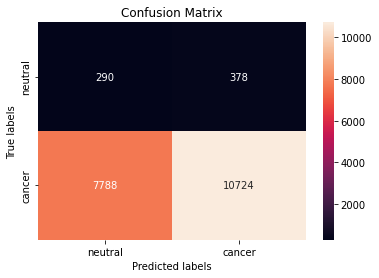

In [36]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

Komplementarni naivni Bajesov model sa podešavanjem težina instanci.

In [68]:
modelNB2 = naive_bayes.ComplementNB()

In [69]:
from sklearn.utils import class_weight
sample = class_weight.compute_sample_weight('balanced', y_train)

In [70]:
modelNB2.fit(X_trainN, y_train, sample_weight=sample)
y_pred=modelNB2.predict(X_testN)

In [71]:
y_predTrain=modelNB2.predict(X_train)

In [40]:
metrics.accuracy_score(y_test, y_pred)

0.5748175182481752

In [72]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.5091774100890699

In [91]:
metrics.recall_score(y_test, y_pred)

0.5797320656871219

In [92]:
metrics.precision_score(y_test, y_pred)

0.9662375078779148

In [93]:
metrics.roc_auc_score(y_test, y_pred)

0.5091774100890699

In [94]:
metrics.confusion_matrix(y_test, y_pred)

array([[  293,   375],
       [ 7780, 10732]])

In [73]:
metrics.balanced_accuracy_score(y_train, y_predTrain)

0.5470824582360555

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

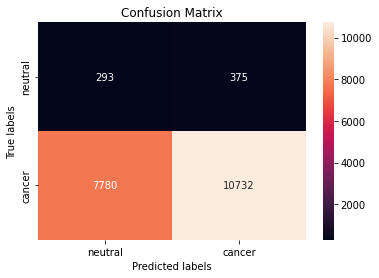

In [95]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

Komplementarni naivni Bajesov model sa podacima na koje je primenjen undersampler-a.

In [21]:
us = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.2)
X_train_resampled_us, y_train_resampled_us = us.fit_resample(X_trainN, y_train)

In [416]:
modelNBus = naive_bayes.ComplementNB()

In [417]:
modelNBus.fit(X_train_resampled_us, y_train_resampled_us)
y_pred=modelNBus.predict(X_testN)

In [418]:
y_predTrain=modelNBus.predict(X_trainN)

In [419]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.5134942409907928

In [423]:
metrics.accuracy_score(y_test, y_pred)

0.5720020855057352

In [424]:
metrics.recall_score(y_test, y_pred)

0.5765989628349178

In [425]:
metrics.precision_score(y_test, y_pred)

0.9664101403349932

In [426]:
metrics.confusion_matrix(y_test, y_pred)

array([[  297,   371],
       [ 7838, 10674]])

In [427]:
metrics.roc_auc_score(y_test, y_pred)

0.5106048706390158

In [420]:
metrics.balanced_accuracy_score(y_train, y_predTrain)

0.5419068975842352

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

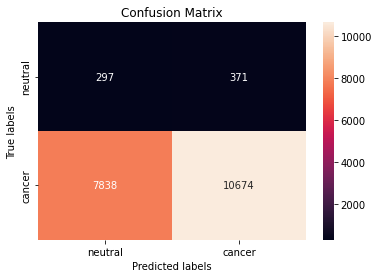

In [428]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

Komplementarni naivni Bajesov model sa podacima na koje je primenjen oversampler-a.

In [22]:
os = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.2)
X_train_resampled_os, y_train_resampled_os = os.fit_resample(X_trainN, y_train)

In [23]:
modelNBos = naive_bayes.ComplementNB()

In [24]:
modelNBos.fit(X_train_resampled_os, y_train_resampled_os)
y_pred=modelNBos.predict(X_testN)

In [25]:
y_predTrain=modelNBos.predict(X_trainN)

In [26]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.5076496747214301

In [23]:
metrics.accuracy_score(y_test, y_pred)

0.5754953076120959

In [27]:
metrics.recall_score(y_test, y_pred)

0.584161624891962

In [28]:
metrics.precision_score(y_test, y_pred)

0.9660532428086475

In [29]:
metrics.roc_auc_score(y_test, y_pred)

0.5076496747214301

In [30]:
metrics.confusion_matrix(y_test, y_pred)

array([[  288,   380],
       [ 7698, 10814]])

In [31]:
metrics.balanced_accuracy_score(y_train, y_predTrain)

0.545042706296142

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

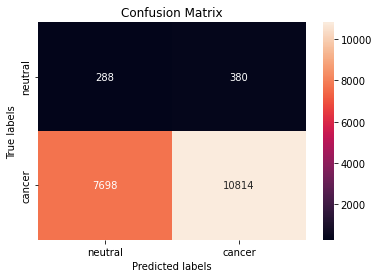

In [32]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

Komplementarni naivni Bajesov model sa podacima na koje je primenjena kombinacija undersampler-a i oversampler-a.

In [21]:
from imblearn.pipeline import Pipeline

In [75]:
os = imblearn.over_sampling.SMOTE(sampling_strategy=0.2)
us = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.2)
pipeline = Pipeline(steps=[('o', os), ('u', us)])
X_train_resampled_comb, y_train_resampled_comb = pipeline.fit_resample(X_trainN, y_train)

In [35]:
modelNBResambleComb = naive_bayes.ComplementNB()

In [36]:
modelNBResambleComb.fit(X_train_resampled_comb, y_train_resampled_comb)
y_pred=modelNBResambleComb.predict(X_test)

In [37]:
y_predTrain=modelNBResambleComb.predict(X_train)

In [59]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.5173806988443166

In [60]:
metrics.accuracy_score(y_test, y_pred)

0.4778415015641293

In [61]:
metrics.recall_score(y_test, y_pred)

0.474881158167675

In [62]:
metrics.precision_score(y_test, y_pred)

0.9676389653274629

In [63]:
metrics.roc_auc_score(y_test, y_pred)

0.5173806988443166

In [64]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 374,  294],
       [9721, 8791]])

In [38]:
metrics.balanced_accuracy_score(y_train, y_predTrain)

0.5447298390642918

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

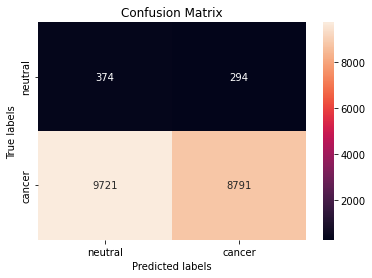

In [65]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

Proces formiranja finalnog modela.

In [34]:
y_final = database['Class']
X_final = database.drop(columns=['Class', 'variation', 'Gene name'])

In [35]:
scalerFinal = preprocessing.StandardScaler()
scalerFinal.fit(X_final)
X_final = scalerFinal.transform(X_final)

In [36]:
pcaFinal = PCA(n_components=300)

In [37]:
pcaFinal.fit(X_final, y_final)

PCA(n_components=300)

In [38]:
X_final_pca = pcaFinal.transform(X_final)

Cuvanje modela.

In [42]:
import pickle

In [26]:
from pickle import dump

In [27]:
y_FinalN = database['Class']
X_FinalN = database.drop(columns=['Class', 'variation', 'Gene name']) 

normFinal = preprocessing.MinMaxScaler()
normFinal.fit(X_FinalN)
X_FinalN = normFinal.transform(X_FinalN)

osF = imblearn.over_sampling.SMOTE(sampling_strategy=0.2)
usF = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.2)
pipelineF = Pipeline(steps=[('o', osF), ('u', usF)])
X_train_resampled_comb_final, y_train_resampled_comb_final = pipelineF.fit_resample(X_FinalN, y_FinalN)

modelNBResambleCombFinal = naive_bayes.ComplementNB()
modelNBResambleCombFinal.fit(X_train_resampled_comb_final, y_train_resampled_comb_final)

with open("ComplementNaiveBayesModel/model", "wb") as f:
    pickle.dump(modelNBResambleCombFinal , f)
    
    
dump(normFinal, open('norm.pkl', 'wb'))